## Import Packages

<p>These packages are used for data preparation, analysis, visualization and applying machine learning concepts</p>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

## Data Preparation

This process includes below steps:
<ol>
<li>Reading of Data</li>
<li>Descriptive Analysis to understand the landscape</li>
<li>Meta Data of the dataset(shape, Attirubute Values, Target attribute and the values in it)</li>
</ol>

In [2]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Basic structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Summary statistics for numerical columns
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
print(f"Shape of dataset: {df.shape}")
print(f"Column names: {df.columns.tolist()}")
print(f"Target column unique values:{df['Attrition'].value_counts()}")

Shape of dataset: (1470, 35)
Column names: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Target column unique values:Attrition
No     1233
Yes     237
Name: count, dtype: int64


## Feature Selection

In [6]:
# Drop non-informative columns
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## Data Encoding

In [8]:
# Convert target to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [9]:
# Label Encode binary columns
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])         # Male=1, Female=0
df['OverTime'] = label_enc.fit_transform(df['OverTime'])     # Yes=1, No=0

In [10]:
# One-Hot Encode other categorical columns
df = pd.get_dummies(df, columns=[
    'BusinessTravel', 'Department', 'EducationField',
    'JobRole', 'MaritalStatus'
], drop_first=False)

## Exploratory Data Analysis (EDA)

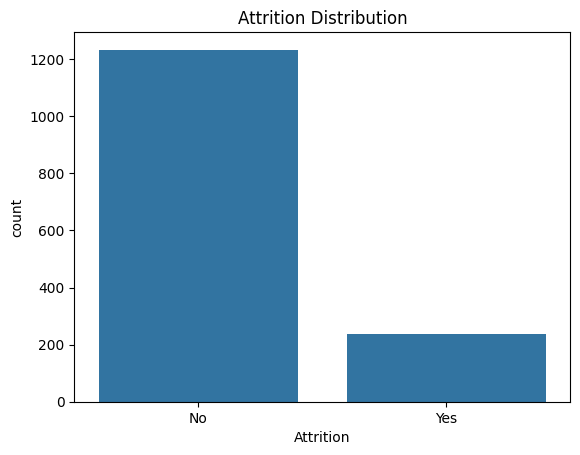

In [11]:

sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


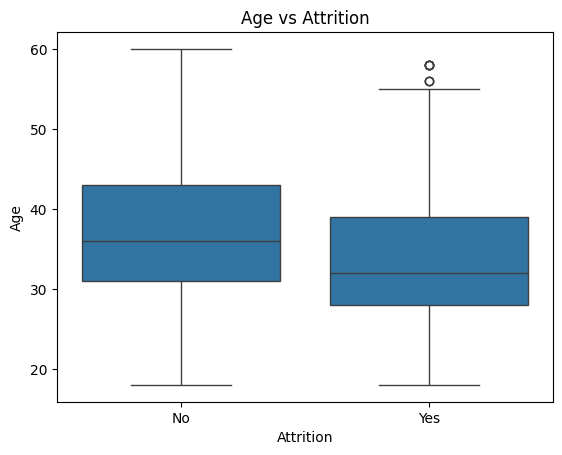

In [12]:
# Example: Age vs Attrition
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


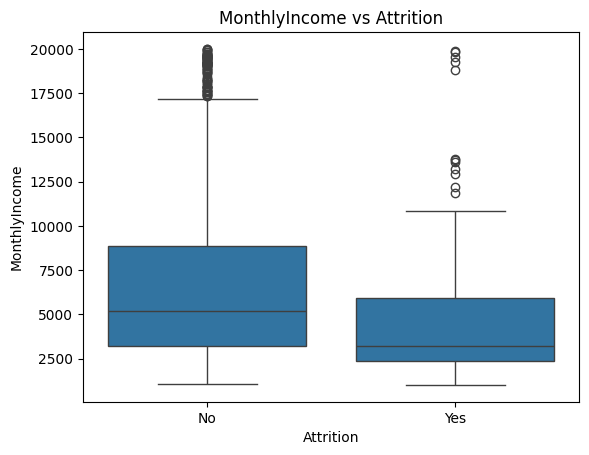

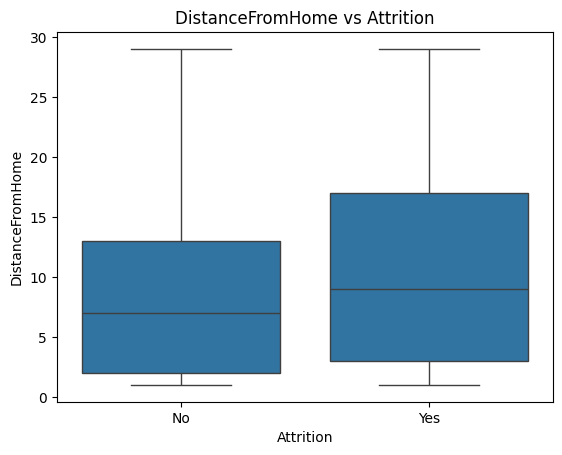

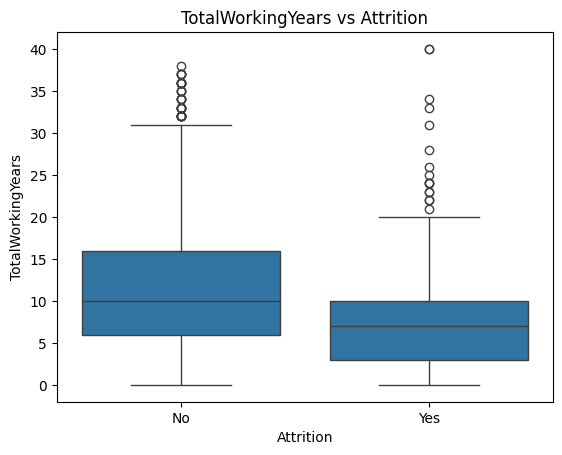

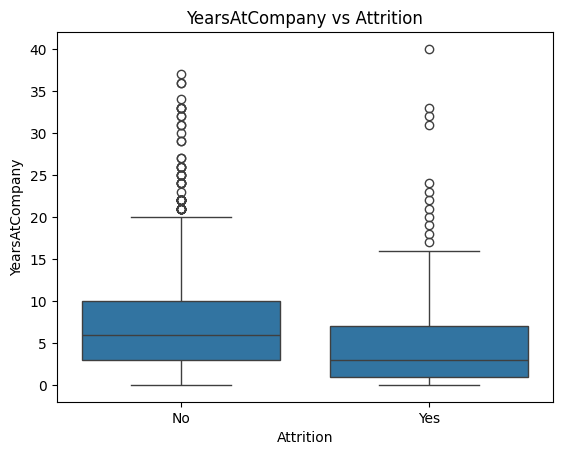

In [13]:
for col in ['MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']:
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} vs Attrition')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()


In [14]:
df['JobRole_Human Resources'].head()

0    False
1    False
2    False
3    False
4    False
Name: JobRole_Human Resources, dtype: bool

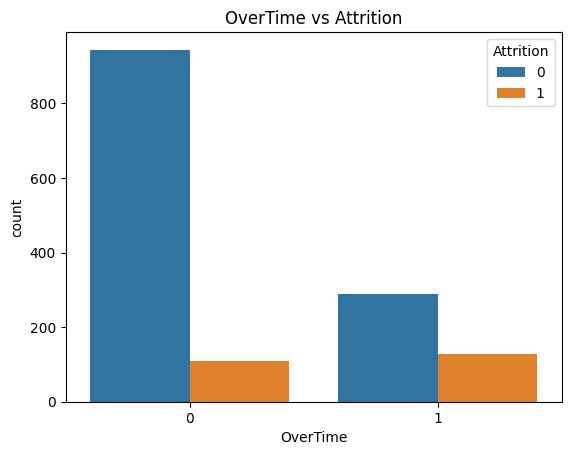

In [15]:
# Overtime vs Attrition
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('OverTime vs Attrition')
plt.show()

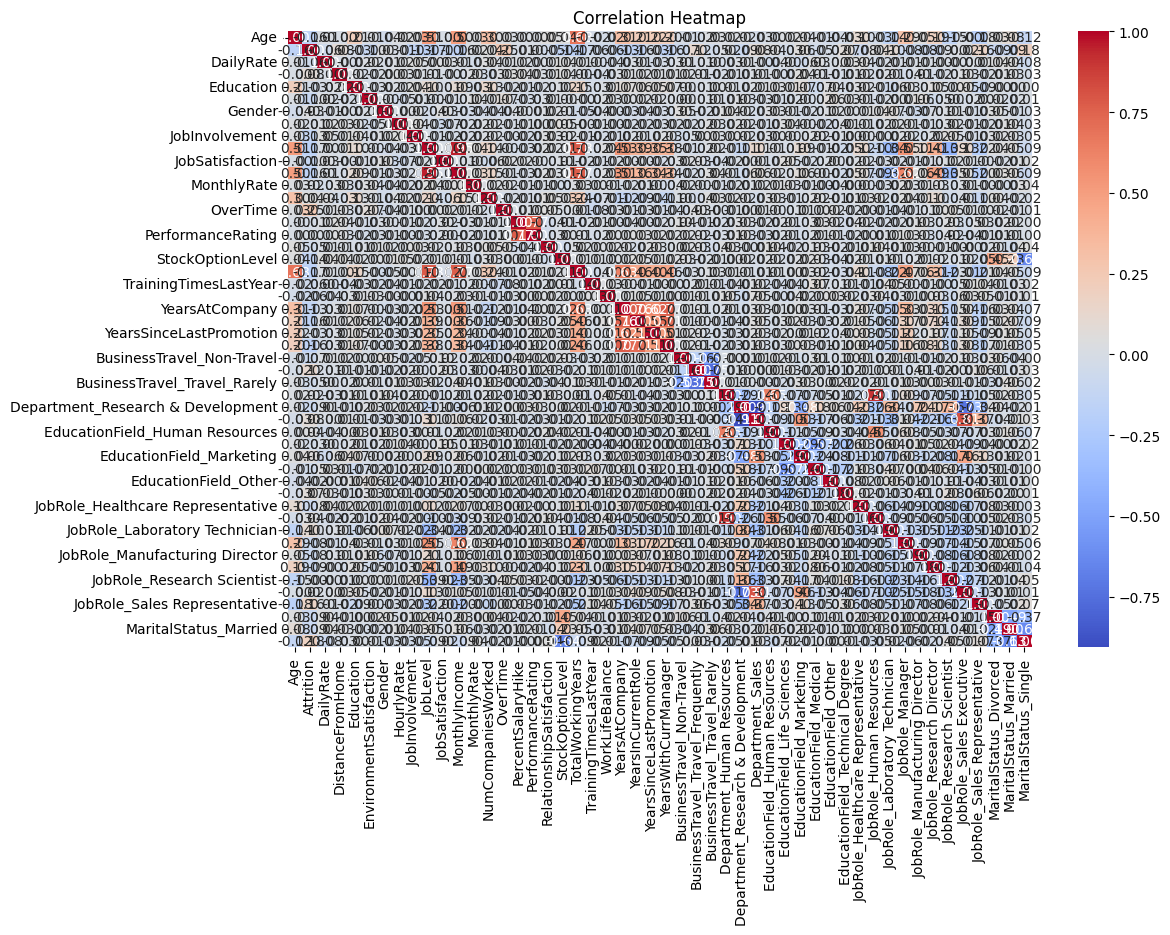

In [16]:
# Only numeric features
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Model Selection & Training

###  1. Split the Data

In [17]:

# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:

# Recreate data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Then split the scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Re-fit model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:51:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Evaluate Models

In [21]:

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"=== {name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
    print()


In [22]:
evaluate_model(logreg, "Logistic Regression")

=== Logistic Regression ===
[[237  10]
 [ 31  16]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

ROC AUC Score: 0.8078215177879232



In [23]:
evaluate_model(rf, "Random Forest")

=== Random Forest ===
[[244   3]
 [ 43   4]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.57      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.71      0.54      0.53       294
weighted avg       0.81      0.84      0.79       294

ROC AUC Score: 0.7718149711430786



In [24]:
evaluate_model(xgb, "XGBoost")

=== XGBoost ===
[[240   7]
 [ 35  12]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.63      0.26      0.36        47

    accuracy                           0.86       294
   macro avg       0.75      0.61      0.64       294
weighted avg       0.83      0.86      0.83       294

ROC AUC Score: 0.7732793522267207



## Hyper-parameter Fine Tuning

### Use Class Weights

In [25]:
logreg = LogisticRegression(class_weight='balanced', max_iter=2000)
logreg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000)

In [26]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3)


In [28]:

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

## Feature Importance in Random Forest / XGBoost

### For Random Forest

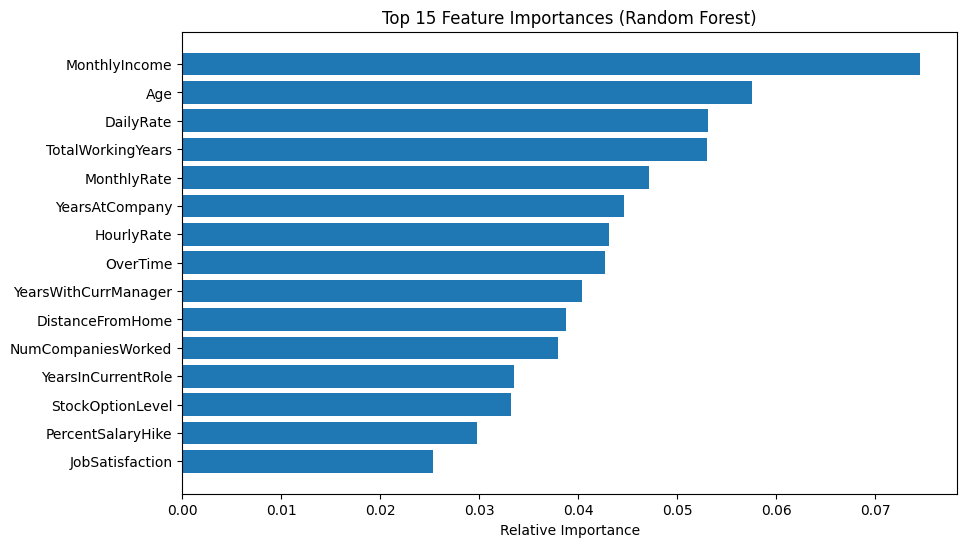

In [29]:

# For Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features
features = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Relative Importance')
plt.show()


### For XGBoost

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:51:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


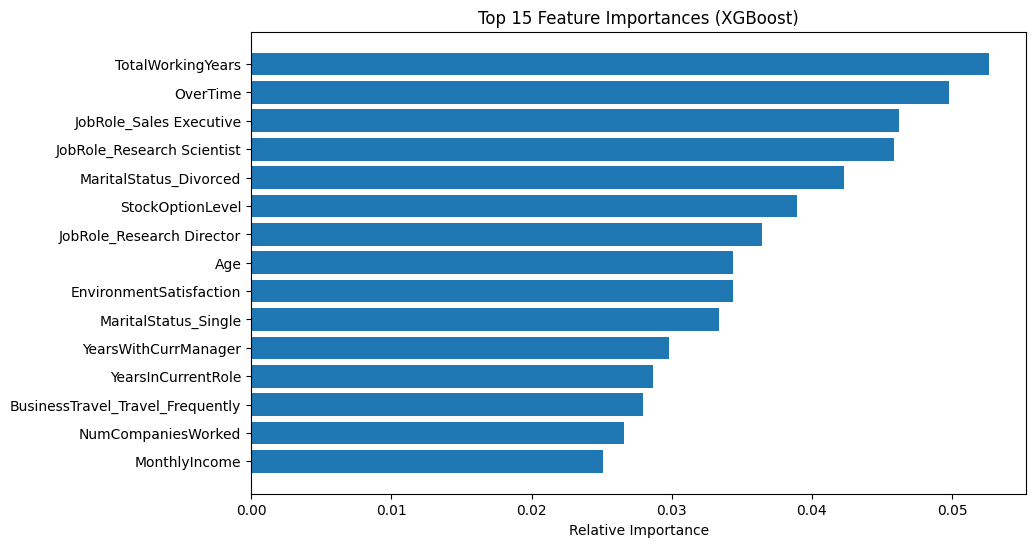

In [30]:

# Reinitialize and train the model (if needed)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)  # 👈 This is essential

# Then get feature importances
import numpy as np
import matplotlib.pyplot as plt

importances = xgb.feature_importances_
indices = np.argsort(importances)[-15:]
features = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features)
plt.title('Top 15 Feature Importances (XGBoost)')
plt.xlabel('Relative Importance')
plt.show()


In [31]:
from sklearn.utils.validation import check_is_fitted
check_is_fitted(xgb)

## Feature Coefficients in Logistic Regression

In [32]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort by absolute value
coefficients['abs'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs', ascending=False).drop(columns='abs')

print(coefficients.head(15))


                          Feature  Coefficient
13                       OverTime     0.769554
8                        JobLevel     0.685437
18              TotalWorkingYears    -0.654951
42      JobRole_Research Director    -0.603582
23        YearsSinceLastPromotion     0.499984
24           YearsWithCurrManager    -0.474026
12             NumCompaniesWorked     0.464140
38        JobRole_Human Resources     0.455569
4         EnvironmentSatisfaction    -0.442862
28     Department_Human Resources    -0.442621
39  JobRole_Laboratory Technician     0.442309
9                 JobSatisfaction    -0.388869
45   JobRole_Sales Representative     0.367252
25      BusinessTravel_Non-Travel    -0.357317
2                DistanceFromHome     0.323621


## Inference

### Model Comparison:
Logistic Regression and XGBoost outperform Random Forest in attrition prediction, offering better balance between accuracy and recall—making them more reliable for informed HR interventions.
### Business Impact:
Predictive insights from employee data enable HR to proactively manage attrition, enhance satisfaction, and retain talent—boosting organizational productivity and workforce stability long-term.
